In [95]:
%run nb_init.py

pandas: pd 2.2.2
numpy: np 2.0.1
scipy: sp 1.14.0
statsmodels: 0.14.2
matplotlib: mpl 3.9.1
seaborn: sns 0.13.2
geopandas: gpd 1.0.1
folium: 0.17.0
requests: 2.32.3


In [96]:
"""
import chardet
with open("시도별_온실가스_중립도 (2015_2020년).csv", mode = 'rb') as f:
    d = f.readline()

print(chardet.detect(d))
"""

'\nimport chardet\nwith open("시도별_온실가스_중립도 (2015_2020년).csv", mode = \'rb\') as f:\n    d = f.readline()\n\nprint(chardet.detect(d))\n'

In [97]:
df = pd.read_csv('시도별_온실가스_중립도 (2015_2020년).csv', low_memory=False)

df.head()

,시도명,년도,온실가스배출량,온실가스흡수량,온실가스중립도
0,강원도,2015,37278744,13037930.91,34.974169
1,강원도,2016,38363320,13038311.56,33.986400
2,강원도,2017,45091192,13035199.40,28.908527
3,강원도,2018,50173656,13028515.42,25.966845
4,강원도,2019,49424508,13025874.40,26.355092


In [98]:
df.describe()

,년도,온실가스배출량,온실가스흡수량,온실가스중립도
count,102.000000,1.020000e+02,1.020000e+02,102.000000
mean,2017.500000,3.627670e+07,3.492469e+06,12.994809
std,1.716259,3.872792e+07,4.019123e+06,10.884849
min,2015.000000,1.443049e+06,1.897330e+05,0.699145
25%,2016.000000,4.588380e+06,3.513094e+05,4.981127
50%,2017.500000,2.189037e+07,6.422155e+05,9.699525
75%,2019.000000,5.220775e+07,5.023958e+06,20.788498
max,2020.000000,1.597312e+08,1.303831e+07,41.435878


In [119]:
#15년부터 20년까지의 시도별 온실가스의 합계
sum_df = df.groupby('년도').agg({
    '온실가스배출량': 'sum',
    '온실가스흡수량': 'sum'
}).reset_index()

sum_df['온실가스중립도'] = sum_df['온실가스배출량'] / sum_df['온실가스흡수량']
# 결과 확인
sum_df.head(17)

,년도,온실가스배출량,온실가스흡수량,온실가스중립도
0,2015,596456951,5.839461e+07,10.214247
1,2016,604898137,6.517060e+07,9.281764
2,2017,633564151,5.839647e+07,10.849356
3,2018,650697304,5.839303e+07,11.143407
4,2019,626998558,5.838742e+07,10.738590
5,2020,587607910,5.748974e+07,10.221091


In [118]:
sum1_df = df.groupby('시도명').agg({
    '온실가스배출량': 'sum',
    '온실가스흡수량': 'sum'
}).reset_index()

sum1_df['온실가스중립도'] = sum1_df['온실가스배출량'] / sum1_df['온실가스흡수량']
# 결과 확인
sum1_df

,시도명,온실가스배출량,온실가스흡수량,온실가스중립도
0,강원도,264537616,7.804682e+07,3.389473
1,경기도,346900856,2.992617e+07,11.591891
2,경상남도,303322580,3.743183e+07,8.103333
3,경상북도,316573980,7.310610e+07,4.330336
4,광주광역시,12081117,1.153570e+06,10.472811
5,대구광역시,27195376,2.814313e+06,9.663237
6,대전광역시,25600305,1.880561e+06,13.613124
7,부산광역시,43670124,2.139089e+06,20.415292
8,서울특별시,70938252,1.361282e+06,52.111362
9,세종특별자치시,12099165,1.498705e+06,8.073082


In [117]:
df.sort_values(by=['년도'], inplace=True)

df['배출량_전년대비'] = df.groupby('시도명')['온실가스배출량'].pct_change() * 100
df['흡수량_전년대비'] = df.groupby('시도명')['온실가스흡수량'].pct_change() * 100
df['중립도_전년대비'] = df.groupby('시도명')['온실가스중립도'].pct_change() * 100


print(df[['시도명', '년도', '배출량_전년대비', '흡수량_전년대비', '중립도_전년대비']])

         시도명    년도   배출량_전년대비  흡수량_전년대비   중립도_전년대비
0        강원도  2015        NaN       NaN        NaN
6        경기도  2015        NaN       NaN        NaN
12      경상남도  2015        NaN       NaN        NaN
18      경상북도  2015        NaN       NaN        NaN
24     광주광역시  2015        NaN       NaN        NaN
..       ...   ...        ...       ...        ...
89   제주특별자치도  2020 -11.923934 -1.587117  11.736238
83      전라북도  2020  -9.059682 -0.669669   9.225846
77      전라남도  2020  -4.990866 -1.813688   3.344077
71     인천광역시  2020  -6.571826 -2.905981   3.923704
101     충청북도  2020  -2.347349 -0.950120   1.430815

[102 rows x 5 columns]


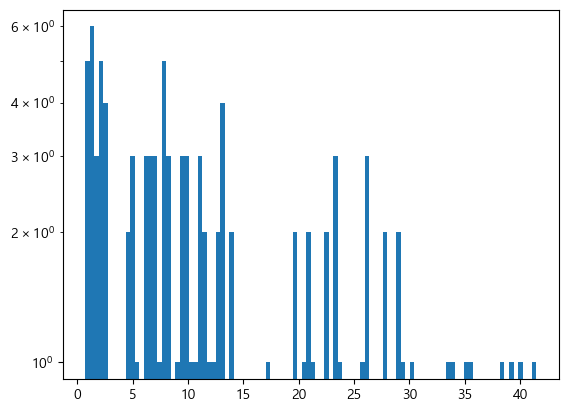

In [120]:
title_df = df['온실가스중립도'].apply(float)
plt.hist(title_df, bins = 100)
plt.yscale('log')
plt.show()

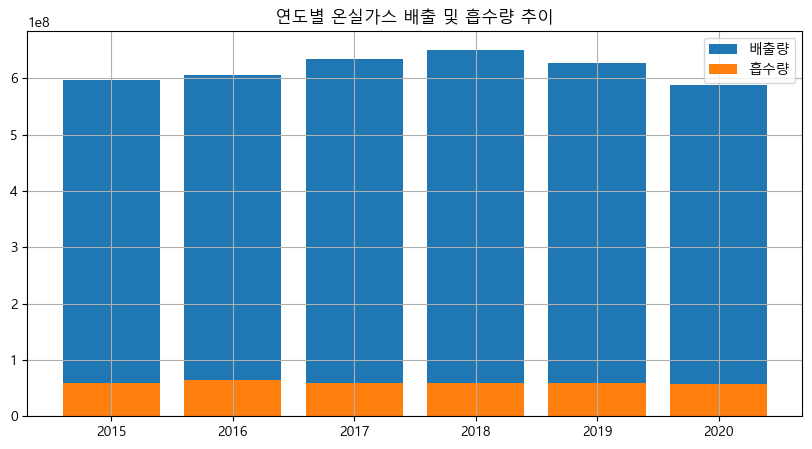

In [121]:
fig, ax = plt.subplots(figsize=(10, 5))

# 막대 그래프
ax.bar(sum_df['년도'], sum_df['온실가스배출량'], label='배출량')
ax.bar(sum_df['년도'], sum_df['온실가스흡수량'], label='흡수량')

# 라벨 및 제목 설정
ax.set_title('연도별 온실가스 배출 및 흡수량 추이')

# 범례 및 격자 추가
ax.legend()
ax.grid(True)

# 그래프 출력
plt.show()

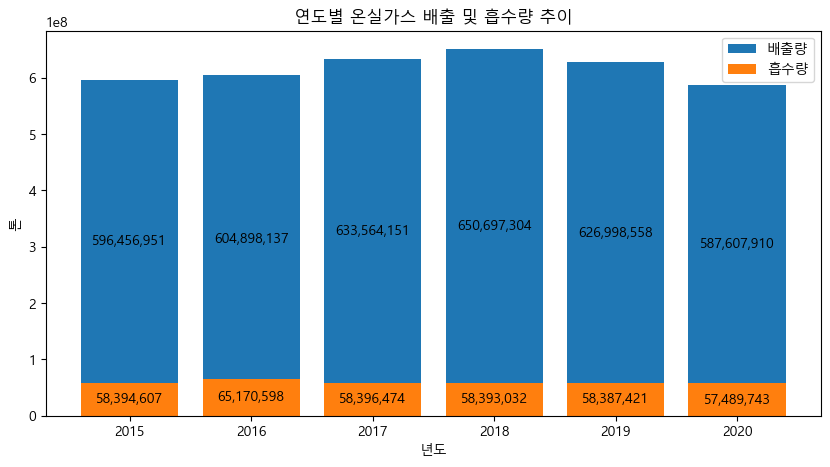

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))

# 막대 그래프
bars1 = ax.bar(sum_df['년도'], sum_df['온실가스배출량'], label='배출량')
bars2 = ax.bar(sum_df['년도'], sum_df['온실가스흡수량'], label='흡수량')

# 데이터 값을 막대 중앙에 표시
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:,.0f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:,.0f}', ha='center', va='center')

# 라벨 및 제목 설정
ax.set_xlabel('년도')
ax.set_ylabel('톤')
ax.set_title('연도별 온실가스 배출 및 흡수량 추이')

# 범례 및 격자 추가
ax.legend()
# 그래프 출력
plt.show()

In [123]:
# 변화율 계산
sum_df['배출량 변화율'] = sum_df['온실가스배출량'].pct_change() * 100
sum_df['흡수량 변화율'] = sum_df['온실가스흡수량'].pct_change() * 100

print(sum_df[['년도', '배출량 변화율', '흡수량 변화율']])

     년도   배출량 변화율    흡수량 변화율
0  2015       NaN        NaN
1  2016  1.415221  11.603796
2  2017  4.738982 -10.394448
3  2018  2.704249  -0.005895
4  2019 -3.642054  -0.009608
5  2020 -6.282414  -1.537452


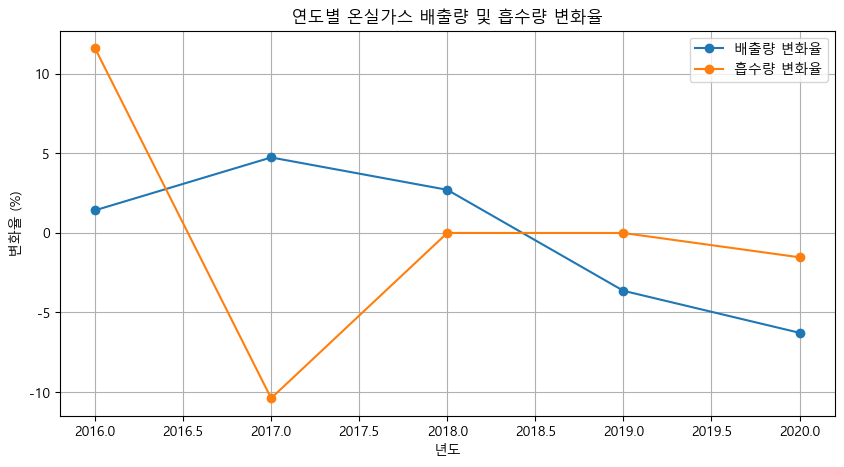

In [129]:
plt.figure(figsize=(10, 5))
plt.plot(sum_df['년도'], sum_df['배출량 변화율'], marker='o', label='배출량 변화율')
plt.plot(sum_df['년도'], sum_df['흡수량 변화율'], marker='o', label='흡수량 변화율')

plt.title('연도별 온실가스 배출량 및 흡수량 변화율')
plt.xlabel('년도')
plt.ylabel('변화율 (%)')
plt.legend()
plt.grid()
plt.show()

# 배출량은 점점 감소하는 추세.
# 흡수량은 증가하는 모습을 보이다가 다시 정체, 변화량 미비한 수준.
# 탄소중립을 위한 정책 시행 후 일부 변동의 폭이 나타났으나, 19년부터 미비한 모습을 보임.

In [125]:
#분산분석에 대한 결과값 확인
from scipy.stats import f_oneway

# 연도별 데이터 그룹
group_2015 = df[df['년도'] == 2015]['온실가스흡수량']
group_2016 = df[df['년도'] == 2016]['온실가스흡수량']
group_2017 = df[df['년도'] == 2017]['온실가스흡수량']
group_2018 = df[df['년도'] == 2018]['온실가스흡수량']
group_2019 = df[df['년도'] == 2019]['온실가스흡수량']
group_2020 = df[df['년도'] == 2020]['온실가스흡수량']

# 일원 분산분석 수행
f_statistic, p_value = f_oneway(group_2015, group_2016, group_2017, group_2018, group_2019, group_2020)

# 결과 출력
print(f'F-통계량: {f_statistic}')
print(f'P-값: {p_value}')


F-통계량: 0.028425562410556954
P-값: 0.9996008321418413


2021년 예측 온실가스 배출량: 620622756
2022년 예측 온실가스 배출량: 621742448


c:\Users\medici\miniconda3\envs\dav\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


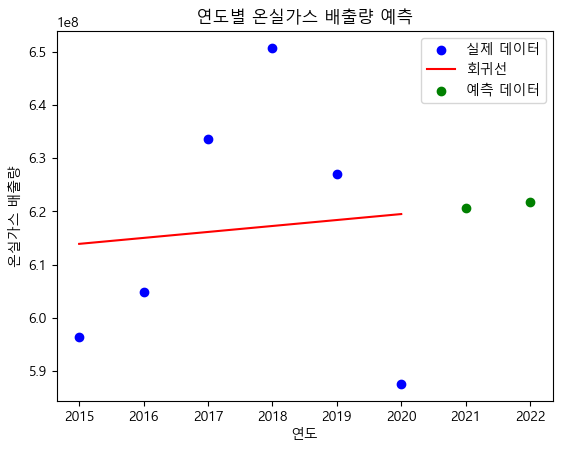

In [108]:
# 선형분석에 대한 모델링 실시.(결과에 대한 사용여부는 토의 후 결정)
# 결론(정책개선을 뒷받침하기 위한 근거로 제시가능함.- 정책을 시행했음에도 목표달성에 유의미한 변동을 주지 못하였다.)

from sklearn.linear_model import LinearRegression

# 특성과 타깃 변수 정의
X = sum_df[['년도']]  # 독립 변수 (연도)
y = sum_df['온실가스배출량']  # 종속 변수 (온실가스 배출량)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X, y)

# 예측할 연도 정의 (예: 2021, 2022)
future_years = np.array([[2021], [2022]])

# 예측 수행
predictions = model.predict(future_years)

# 예측 결과 출력
for year, pred in zip(future_years.flatten(), predictions):
    print(f'{year}년 예측 온실가스 배출량: {pred:.0f}')

import matplotlib.pyplot as plt

# 실제 데이터
plt.scatter(X, y, color='blue', label='실제 데이터')

# 선형 회귀선
plt.plot(X, model.predict(X), color='red', label='회귀선')

# 예측 데이터
plt.scatter(future_years, predictions, color='green', label='예측 데이터')

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('온실가스 배출량')
plt.title('연도별 온실가스 배출량 예측')
plt.legend()

# 그래프 출력
plt.show()


In [109]:
sum_df['년도'] = pd.to_datetime(sum_df['년도'], format='%Y')
sum_df.set_index('년도', inplace=True)

In [110]:
# 시계열분석에 대한 모델링 실시.(결과에 대한 사용여부는 토의 후 결정)
# 결론(정책개선을 뒷받침하기 위한 근거로 제시가능함.- 정책을 시행했음에도 목표달성에 유의미한 변동을 주지 못하였다.)


# 특성 (X)와 타겟 (y) 변수 정의
X = sum_df.index.map(lambda x: x.year).values.reshape(-1, 1)  # 연도를 숫자로 변환
y = sum_df['온실가스흡수량']

# 상수항 추가 (회귀분석에 필요)
X = sm.add_constant(X)

# OLS 회귀 모델 생성
model = sm.OLS(y, X)
results = model.fit()
# 모델 요약 출력
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                온실가스흡수량   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.100
Date:                Wed, 14 Aug 2024   Prob (F-statistic):              0.354
Time:                        16:37:49   Log-Likelihood:                -96.444
No. Observations:                   6   AIC:                             196.9
Df Residuals:                       4   BIC:                             196.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.493e+09   1.37e+09      1.092      0.3

c:\Users\medici\miniconda3\envs\dav\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [111]:
# 예측할 연도 정의
future_years = pd.DataFrame({
    '년도': [2021, 2022]
})

# 연도를 시계열로 변환
future_years['년도'] = pd.to_datetime(future_years['년도'], format='%Y')
future_years.set_index('년도', inplace=True)

# 특성 (X) 정의 및 상수항 추가
X_future = future_years.index.map(lambda x: x.year).values.reshape(-1, 1)
X_future = sm.add_constant(X_future)

# 예측 수행
predictions = results.predict(X_future)

# 예측 결과 출력
for year, pred in zip(future_years.index.year, predictions):
    print(f'{year}년 예측 온실가스 흡수량: {pred:.0f}')


2021년 예측 온실가스 흡수량: 56884250
2022년 예측 온실가스 흡수량: 56173470


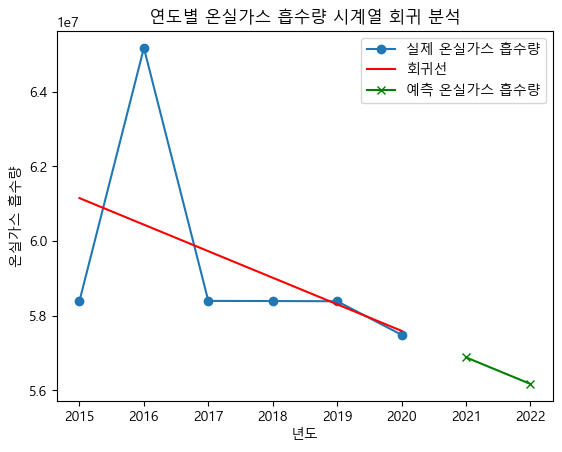

In [112]:

# 실제 데이터 플롯
plt.plot(sum_df.index.year, y, label='실제 온실가스 흡수량', marker='o')

# 회귀선 플롯
plt.plot(sum_df.index.year, results.fittedvalues, label='회귀선', color='red')

# 예측 데이터 플롯
plt.plot(future_years.index.year, predictions, label='예측 온실가스 흡수량', marker='x', color='green')

# 그래프 설정
plt.xlabel('년도')
plt.ylabel('온실가스 흡수량')
plt.title('연도별 온실가스 흡수량 시계열 회귀 분석')
plt.legend()

# 그래프 출력
plt.show()
